In [9]:
import math
import random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Normal

from sac_openai_cuda import sac
from sac_openai_cuda_nets import MLPActorCritic
import time

In [11]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib tk

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
env_fn = lambda: gym.make('BipedalWalker-v2')

# untrained network acting

In [5]:
# actor_net = MLPActorCritic(env_fn)
# actor_net, step_log, episode_log  = sac(
#     env_fn,
#     steps_per_epoch=0,
#     epochs=0,
#     use_logger=False,
#     # device=device
# )

# env = gym.make("BipedalWalker-v2")
# for i in range(10):
#     print(i)
#     state = env.reset()
#     while True:
#         # action = agent.act(state)
#         env.render()
#         action = actor_net.act(
#             torch.as_tensor(state, dtype=torch.float32), deterministic=True
#         )
#         # action = policy_net.get_action(state)
#         next_state, reward, done, _ = env.step(action)
#         state = next_state
#         if done:
#             break

# env.close()

# do some training


In [ ]:
ac, step_log, episode_log = sac(
    env_fn,
    start_steps=50000,
    steps_per_epoch=100,
    epochs=100,
    use_logger=False,
    update_every=10,
    # alpha=.5,
    batch_size=256,
    lr=0.0005,
    device=device
)

<_io.BufferedWriter name='/home/bc/projects/deep_rl/soft_actor_critic/model_runs/2020-05-01T16_50_29.230407/log.pkl'>

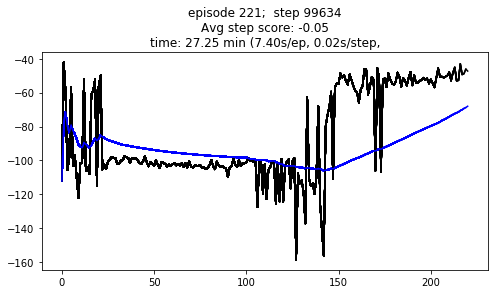

Epoch 100; 221 episodes; 99999 steps;	elapsed time: 27.37 minutes


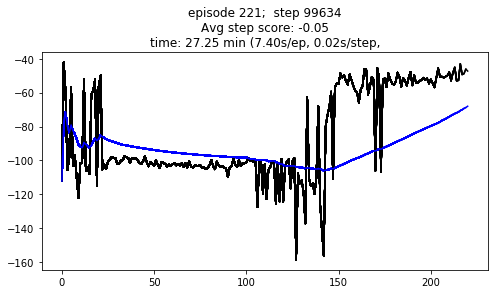

In [5]:
# env_fn = lambda: gym.make("Pendulum-v0")
actor_net = sac(
    env_fn,
    steps_per_epoch=1000,
    epochs=100,
    use_logger=False,
    alpha=.3,
    device=device
)

Epoch 100; 140 episodes; 99999 steps;	elapsed time: 29.72 minutes


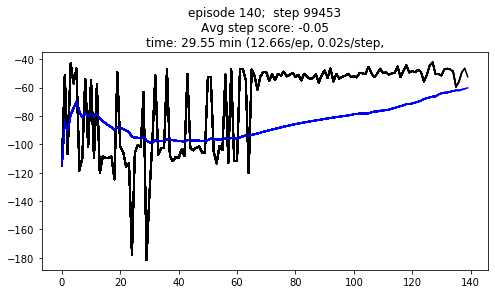

In [6]:
actor_net = sac(
    env_fn,
    steps_per_epoch=1000,
    epochs=100,
    use_logger=False,
    alpha=.3,
    device="cpu"
)

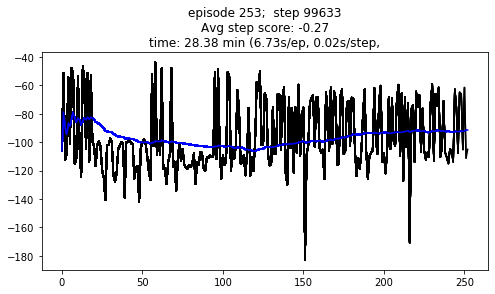

Epoch 100; 253 episodes; 99999 steps;	elapsed time: 28.50 minutes


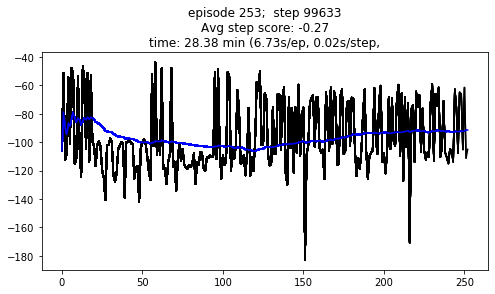

In [8]:
actor_net = sac(
    env_fn,
    steps_per_epoch=1000,
    epochs=100,
    use_logger=False,
    alpha=.3,
    batch_size=256,
    lr=7e-2,
    update_every=1,
    device=device
)

In [17]:
def newAcFromOld(old_net):
    def constructor(*args,**kwargs):
        new_net = MLPActorCritic(*args,**kwargs)
        new_net.pi = old_net.pi
        new_net.q1 = old_net.q1
        new_net.q2 = old_net.q2
        new_net.device = old_net.device
        return new_net
    return constructor

actor_net2 = sac(
    env_fn,
    actor_critic = newAcFromOld(actor_net2), #########   <<----  WATCH OUT
    start_steps=0,
    steps_per_epoch=1000,
    # max_ep_len=100,
    update_every=1,
    epochs=20,
    use_logger=False,
    alpha=.2,
    lr=0.0005,
    # batch_size=256,
    # lr=7e-3,
    device=device
)

Epoch 20; 20 episodes; 19999 steps;	elapsed time: 5.20 minutes


In [12]:
env = gym.make("BipedalWalker-v2")
for i in range(10):
    print(i)
    state = env.reset()
    for j in range(200):
        # action = agent.act(state)
        env.render()
        action = actor_net.act(
            torch.as_tensor(state, dtype=torch.float32).to(device),
            # deterministic=True
        )
        # action = policy_net.get_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        if done:
            break

env.close()

0
1
2
3
4
5
6
7
8
9


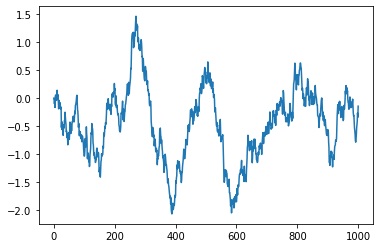

In [30]:
mu=0.0
theta=0.005
sigma=0.1
states = [mu]
state=mu

for t in range(1000):
    x = state
    dx = theta * (mu - x) + sigma*np.random.randn(1)
    state = x + dx
    states.append(state)

plt.plot(states)